<a href="https://colab.research.google.com/github/MehmetImmarBabar/Data-Science-and-ML/blob/main/Final_Mega_project_31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving battery-report.html to battery-report.html
Uploaded file "battery-report.html" with length 88473 bytes


In [ ]:
import pandas as pd
from bs4 import BeautifulSoup
with open("battery-report.html", "r") as file:
    content = file.read()
soup = BeautifulSoup(content, 'html.parser')


tables = pd.read_html(str(soup))
battery_SOC = tables[2]
battery_SOH = tables[5]

battery_SOC['SOC']= battery_SOC['CAPACITY REMAINING']
battery_SOC.drop(columns=['CAPACITY REMAINING'], inplace=True)
battery_SOC.head()


,START TIME,STATE,SOURCE,CAPACITY REMAINING.1,SOC
0,2024-07-06 15:50:37,Active,Battery,"26,030 mWh",96 %
1,15:50:37,Suspended,NaN,"26,030 mWh",96 %
2,17:35:44,Active,Battery,"25,241 mWh",93 %
3,18:19:29,Suspended,NaN,"17,582 mWh",65 %
4,19:26:56,Active,Battery,"17,005 mWh",63 %


In [ ]:
import re
battery_SOH['DESIGN CAPACITY mWH'] = battery_SOH['DESIGN CAPACITY'].str.replace('[^\d,]', '', regex=True)  # Remove non-numeric characters and commas, then convert to float
battery_SOH['DESIGN CAPACITY mWH'] = battery_SOH['DESIGN CAPACITY mWH'].str.replace(',', '').astype(float)
battery_SOH.drop(columns=['DESIGN CAPACITY'], inplace=True)
battery_SOH.head()

,PERIOD,FULL CHARGE CAPACITY,DESIGN CAPACITY mWH
0,2023-05-01 - 2023-05-08,"35,609 mWh",73993.0
1,2023-05-08 - 2023-05-15,"35,609 mWh",73993.0
2,2023-05-15 - 2023-05-22,"35,609 mWh",73993.0
3,2023-05-22 - 2023-05-29,"35,609 mWh",73993.0
4,2023-05-29 - 2023-06-05,"35,609 mWh",73993.0


In [ ]:
battery_SOH['FULL CHARGE CAPACITY mWH'] = battery_SOH['FULL CHARGE CAPACITY'].str.replace('[^\d,]', '', regex=True)
battery_SOH['FULL CHARGE CAPACITY mWH'] = battery_SOH['FULL CHARGE CAPACITY mWH'].str.replace(',', '').astype(float)
battery_SOH.drop(columns=['FULL CHARGE CAPACITY'],inplace=True)
battery_SOH.head()

,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH
0,2023-05-01 - 2023-05-08,73993.0,35609.0
1,2023-05-08 - 2023-05-15,73993.0,35609.0
2,2023-05-15 - 2023-05-22,73993.0,35609.0
3,2023-05-22 - 2023-05-29,73993.0,35609.0
4,2023-05-29 - 2023-06-05,73993.0,35609.0


In [ ]:
battery_SOH['SOH'] = (battery_SOH['FULL CHARGE CAPACITY mWH'] / battery_SOH['DESIGN CAPACITY mWH'])*100
battery_SOH.head()


,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH
0,2023-05-01 - 2023-05-08,73993.0,35609.0,48.124823
1,2023-05-08 - 2023-05-15,73993.0,35609.0,48.124823
2,2023-05-15 - 2023-05-22,73993.0,35609.0,48.124823
3,2023-05-22 - 2023-05-29,73993.0,35609.0,48.124823
4,2023-05-29 - 2023-06-05,73993.0,35609.0,48.124823


In [ ]:
battery_SOH['DAYS USED'] = range(7, 7 + len(battery_SOH) * 7, 7)
battery_SOH.drop(index=range(60, 68))
#-67 t0 60
battery_SOH.head()

,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH,DAYS USED
0,2023-05-01 - 2023-05-08,73993.0,35609.0,48.124823,7
1,2023-05-08 - 2023-05-15,73993.0,35609.0,48.124823,14
2,2023-05-15 - 2023-05-22,73993.0,35609.0,48.124823,21
3,2023-05-22 - 2023-05-29,73993.0,35609.0,48.124823,28
4,2023-05-29 - 2023-06-05,73993.0,35609.0,48.124823,35


In [ ]:
battery_SOH['Capacity mWH'] = 0
battery_SOH.loc[:29, 'Capacity mWH'] = 70293
battery_SOH.head(5)

,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH,DAYS USED,Capacity mWH
0,2023-05-01 - 2023-05-08,73993.0,35609.0,48.124823,7,70293
1,2023-05-08 - 2023-05-15,73993.0,35609.0,48.124823,14,70293
2,2023-05-15 - 2023-05-22,73993.0,35609.0,48.124823,21,70293
3,2023-05-22 - 2023-05-29,73993.0,35609.0,48.124823,28,70293
4,2023-05-29 - 2023-06-05,73993.0,35609.0,48.124823,35,70293


In [ ]:
start_value = 70293
end_value = 35609
num_rows = 147 - 30 + 1
decrement_per_row = (start_value - end_value) / (num_rows - 1)

for i in range(30, 148):
    battery_SOH.loc[i, 'Capacity mWH'] = round(start_value - (i - 30) * decrement_per_row,1)  # Update the values from the 30th row to the 147th row
battery_SOH.head()

,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH,DAYS USED,Capacity mWH
0,2023-05-01 - 2023-05-08,73993.0,35609.0,48.124823,7.0,70293.0
1,2023-05-08 - 2023-05-15,73993.0,35609.0,48.124823,14.0,70293.0
2,2023-05-15 - 2023-05-22,73993.0,35609.0,48.124823,21.0,70293.0
3,2023-05-22 - 2023-05-29,73993.0,35609.0,48.124823,28.0,70293.0
4,2023-05-29 - 2023-06-05,73993.0,35609.0,48.124823,35.0,70293.0


In [ ]:
battery_SOH=battery_SOH.reindex(range(214))
battery_SOH['Capacity mWH'] = battery_SOH['Capacity mWH'].tolist()[:147] + battery_SOH['FULL CHARGE CAPACITY mWH'].tolist()[:67]
battery_SOH.head()

,PERIOD,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH,DAYS USED,Capacity mWH
0,2023-05-01 - 2023-05-08,73993.0,35609.0,48.124823,7.0,70293.0
1,2023-05-08 - 2023-05-15,73993.0,35609.0,48.124823,14.0,70293.0
2,2023-05-15 - 2023-05-22,73993.0,35609.0,48.124823,21.0,70293.0
3,2023-05-22 - 2023-05-29,73993.0,35609.0,48.124823,28.0,70293.0
4,2023-05-29 - 2023-06-05,73993.0,35609.0,48.124823,35.0,70293.0


In [ ]:
battery_SOH.drop(columns=['PERIOD'],inplace=True)
battery_SOH.head(5)


,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,SOH,DAYS USED,Capacity mWH
0,73993.0,35609.0,48.124823,7.0,70293.0
1,73993.0,35609.0,48.124823,14.0,70293.0
2,73993.0,35609.0,48.124823,21.0,70293.0
3,73993.0,35609.0,48.124823,28.0,70293.0
4,73993.0,35609.0,48.124823,35.0,70293.0


In [ ]:
#battery_SOH['DESIGN CAPACITY mWH'].replace('NaN'==73993, inplace=True)
battery_SOH['DESIGN CAPACITY mWH'].fillna(73993, inplace=True)

In [ ]:
battery_SOH['DAYS USED'] = range(7, 7 + len(battery_SOH) * 7, 7)


In [ ]:
battery_SOH.drop(columns=['FULL CHARGE CAPACITY mWH'],inplace=True)

In [ ]:
battery_SOH.rename(columns={'Capacity mWH': 'FULL CHARGE CAPACITY mWH'}, inplace=True)

In [ ]:
battery_SOH.head()

,DESIGN CAPACITY mWH,SOH,DAYS USED,FULL CHARGE CAPACITY mWH
0,73993.0,48.124823,7,70293.0
1,73993.0,48.124823,14,70293.0
2,73993.0,48.124823,21,70293.0
3,73993.0,48.124823,28,70293.0
4,73993.0,48.124823,35,70293.0


In [ ]:
battery_SOH['SOH']=(battery_SOH['FULL CHARGE CAPACITY mWH']/battery_SOH['DESIGN CAPACITY mWH'])*100

In [ ]:
new_column_order = ['DESIGN CAPACITY mWH','FULL CHARGE CAPACITY mWH','DAYS USED', 'SOH', ]
battery_SOH = battery_SOH[new_column_order]
battery_SOH.head(5)

,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,DAYS USED,SOH
0,73993.0,70293.0,7,94.999527
1,73993.0,70293.0,14,94.999527
2,73993.0,70293.0,21,94.999527
3,73993.0,70293.0,28,94.999527
4,73993.0,70293.0,35,94.999527


In [ ]:
battery_SOH['HOURS USED']=battery_SOH['DAYS USED']*24
battery_SOH.drop(battery_SOH.tail(4).index, inplace=True)
battery_SOH.head(5)

,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,DAYS USED,SOH,HOURS USED
0,73993.0,70293.0,7,94.999527,168
1,73993.0,70293.0,14,94.999527,336
2,73993.0,70293.0,21,94.999527,504
3,73993.0,70293.0,28,94.999527,672
4,73993.0,70293.0,35,94.999527,840


In [ ]:
battery_SOH.tail()

,DESIGN CAPACITY mWH,FULL CHARGE CAPACITY mWH,DAYS USED,SOH,HOURS USED
205,73993.0,27084.0,1442,36.603462,34608
206,73993.0,27084.0,1449,36.603462,34776
207,73993.0,27084.0,1456,36.603462,34944
208,73993.0,27084.0,1463,36.603462,35112
209,73993.0,27084.0,1470,36.603462,35280


In [ ]:
battery_SOC.head()

,START TIME,STATE,SOURCE,CAPACITY REMAINING.1,SOC
0,2024-07-06 15:50:37,Active,Battery,"26,030 mWh",96 %
1,15:50:37,Suspended,NaN,"26,030 mWh",96 %
2,17:35:44,Active,Battery,"25,241 mWh",93 %
3,18:19:29,Suspended,NaN,"17,582 mWh",65 %
4,19:26:56,Active,Battery,"17,005 mWh",63 %


In [ ]:
battery_SOC1=battery_SOC[battery_SOC['SOURCE']=='Battery']
battery_SOC1.head(5)

,START TIME,STATE,SOURCE,CAPACITY REMAINING.1,SOC
0,2024-07-06 15:50:37,Active,Battery,"26,030 mWh",96 %
2,17:35:44,Active,Battery,"25,241 mWh",93 %
4,19:26:56,Active,Battery,"17,005 mWh",63 %
6,19:44:50,Active,Battery,"15,240 mWh",56 %
14,02:52:05,Active,Battery,"27,084 mWh",100 %


In [ ]:
battery_SOC1.reset_index(drop=True, inplace=True)
battery_SOC1['TIME'] = battery_SOC1['START TIME'].apply(lambda x: x.split(' ')[-1])
battery_SOC1['TIME'] = pd.to_datetime(battery_SOC1['TIME'], format='%H:%M:%S')
battery_SOC1['HOURS USED'] = battery_SOC1['TIME'].diff().dt.total_seconds() / 3600
battery_SOC1['HOURS USED'] = battery_SOC1['HOURS USED'].fillna(0)

for i in range(1, len(battery_SOC1)):
    if battery_SOC1.loc[i, 'HOURS USED'] < 0:
        battery_SOC1.loc[i, 'HOURS USED'] += 24

battery_SOC1['HOURS USED'] = battery_SOC1['HOURS USED'].cumsum()
battery_SOC1['TIME'] = battery_SOC1['TIME'].dt.time
battery_SOC1.head(5)

<ipython-input-25-282e871af3eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC1['TIME'] = battery_SOC1['START TIME'].apply(lambda x: x.split(' ')[-1])  # Split 'START TIME' to remove the date part and keep only the time part
<ipython-input-25-282e871af3eb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC1['TIME'] = pd.to_datetime(battery_SOC1['TIME'], format='%H:%M:%S')
<ipython-input-25-282e871af3eb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,START TIME,STATE,SOURCE,CAPACITY REMAINING.1,SOC,TIME,HOURS USED
0,2024-07-06 15:50:37,Active,Battery,"26,030 mWh",96 %,15:50:37,0.000000
1,17:35:44,Active,Battery,"25,241 mWh",93 %,17:35:44,1.751944
2,19:26:56,Active,Battery,"17,005 mWh",63 %,19:26:56,3.605278
3,19:44:50,Active,Battery,"15,240 mWh",56 %,19:44:50,3.903611
4,02:52:05,Active,Battery,"27,084 mWh",100 %,02:52:05,11.024444


In [ ]:
battery_SOC_final=battery_SOC1.drop(columns=['START TIME','STATE'],inplace=True)

<ipython-input-26-caaabe26e6d3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC_final=battery_SOC1.drop(columns=['START TIME','STATE'],inplace=True)


In [ ]:
battery_SOC1.head()

,SOURCE,CAPACITY REMAINING.1,SOC,TIME,HOURS USED
0,Battery,"26,030 mWh",96 %,15:50:37,0.000000
1,Battery,"25,241 mWh",93 %,17:35:44,1.751944
2,Battery,"17,005 mWh",63 %,19:26:56,3.605278
3,Battery,"15,240 mWh",56 %,19:44:50,3.903611
4,Battery,"27,084 mWh",100 %,02:52:05,11.024444


In [ ]:
battery_SOC1.rename(columns={'CAPACITY REMAINING.1': 'FULL CHARGE CAPACITY mWH'}, inplace=True)
battery_SOC1.head(5)

<ipython-input-28-d540cf117323>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC1.rename(columns={'CAPACITY REMAINING.1': 'FULL CHARGE CAPACITY mWH'}, inplace=True)


,SOURCE,FULL CHARGE CAPACITY mWH,SOC,TIME,HOURS USED
0,Battery,"26,030 mWh",96 %,15:50:37,0.000000
1,Battery,"25,241 mWh",93 %,17:35:44,1.751944
2,Battery,"17,005 mWh",63 %,19:26:56,3.605278
3,Battery,"15,240 mWh",56 %,19:44:50,3.903611
4,Battery,"27,084 mWh",100 %,02:52:05,11.024444


In [ ]:
print(battery_SOH.shape)

(210, 5)


In [ ]:
battery_SOC1['SOC %'] = battery_SOC1['SOC'].str.replace('[^\d,]', '', regex=True).astype(float)
battery_SOC1.drop(columns=['SOC'],inplace=True)
battery_SOC1.head(5)

<ipython-input-30-861fdd1380aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC1['SOC %'] = battery_SOC1['SOC'].str.replace('[^\d,]', '', regex=True).astype(float)
<ipython-input-30-861fdd1380aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  battery_SOC1.drop(columns=['SOC'],inplace=True)


,SOURCE,FULL CHARGE CAPACITY mWH,TIME,HOURS USED,SOC %
0,Battery,"26,030 mWh",15:50:37,0.000000,96.0
1,Battery,"25,241 mWh",17:35:44,1.751944,93.0
2,Battery,"17,005 mWh",19:26:56,3.605278,63.0
3,Battery,"15,240 mWh",19:44:50,3.903611,56.0
4,Battery,"27,084 mWh",02:52:05,11.024444,100.0


In [ ]:
battery_SOC2 = pd.concat([battery_SOC1] * 15, ignore_index=True)
print(battery_SOC2.shape)
battery_SOC2.head(5)

(210, 5)


,SOURCE,FULL CHARGE CAPACITY mWH,TIME,HOURS USED,SOC %
0,Battery,"26,030 mWh",15:50:37,0.000000,96.0
1,Battery,"25,241 mWh",17:35:44,1.751944,93.0
2,Battery,"17,005 mWh",19:26:56,3.605278,63.0
3,Battery,"15,240 mWh",19:44:50,3.903611,56.0
4,Battery,"27,084 mWh",02:52:05,11.024444,100.0


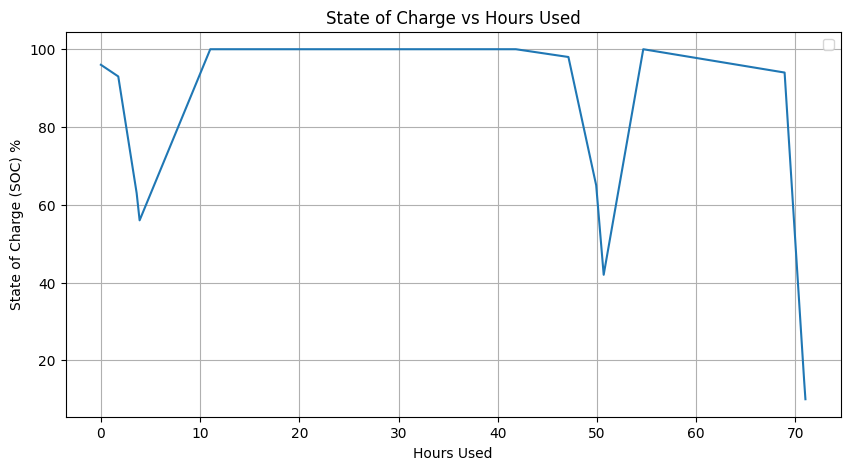

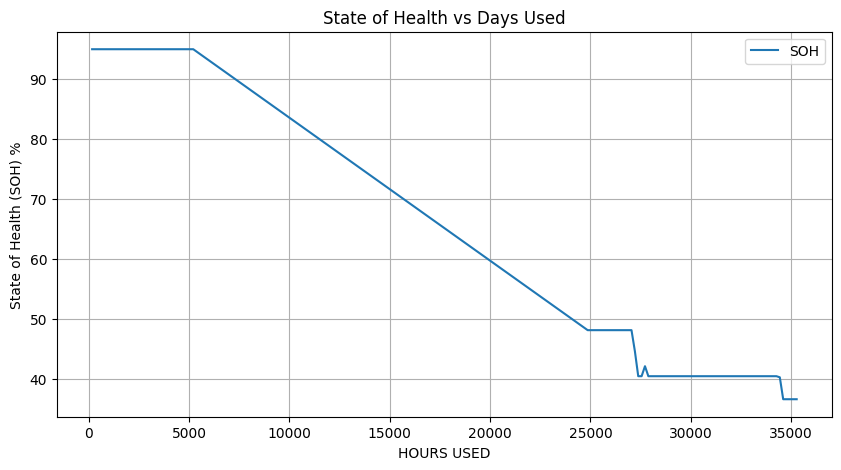

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(battery_SOC1['HOURS USED'], battery_SOC1['SOC %'])
plt.xlabel('Hours Used')
plt.ylabel('State of Charge (SOC) %')
plt.title('State of Charge vs Hours Used')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(battery_SOH['HOURS USED'], battery_SOH['SOH'], label='SOH')
plt.xlabel('HOURS USED')
plt.ylabel('State of Health (SOH) %')
plt.title('State of Health vs Days Used')
plt.legend()
plt.grid(True)
plt.show()



Epoch 1/50
6/6 [==============================] - 13s 544ms/step - loss: 0.2990 - val_loss: 0.0057
Epoch 2/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0279 - val_loss: 0.0412
Epoch 3/50
6/6 [==============================] - 0s 23ms/step - loss: 0.0414 - val_loss: 0.0227
Epoch 4/50
6/6 [==============================] - 0s 21ms/step - loss: 0.0099 - val_loss: 0.0096
Epoch 5/50
6/6 [==============================] - 0s 24ms/step - loss: 0.0137 - val_loss: 0.0091
Epoch 6/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0094 - val_loss: 0.0127
Epoch 7/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0087 - val_loss: 0.0117
Epoch 8/50
6/6 [==============================] - 0s 22ms/step - loss: 0.0062 - val_loss: 0.0058
Epoch 9/50
6/6 [==============================] - 0s 27ms/step - loss: 0.0064 - val_loss: 0.0035
Epoch 10/50
6/6 [==============================] - 0s 25ms/step - loss: 0.0066 - val_loss: 0.0036
Epoch 11/50
6/6 [==========

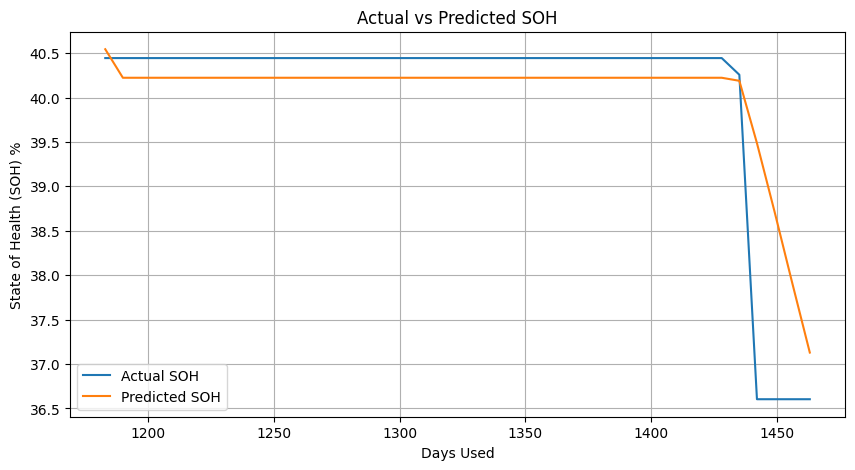

1/1 [==============================] - 0s 33ms/step
Iteration 0: Predicted SOH = 36.43067169189453
1/1 [==============================] - 0s 47ms/step
Iteration 1: Predicted SOH = 36.39949035644531
1/1 [==============================] - 0s 40ms/step
Iteration 2: Predicted SOH = 36.359458923339844
1/1 [==============================] - 0s 32ms/step
Iteration 3: Predicted SOH = 36.310237884521484
1/1 [==============================] - 0s 43ms/step
Iteration 4: Predicted SOH = 36.251583099365234
1/1 [==============================] - 0s 48ms/step
Iteration 5: Predicted SOH = 36.183570861816406
1/1 [==============================] - 0s 45ms/step
Iteration 6: Predicted SOH = 36.13530731201172
1/1 [==============================] - 0s 49ms/step
Iteration 7: Predicted SOH = 36.08323287963867
1/1 [==============================] - 0s 49ms/step
Iteration 8: Predicted SOH = 36.02878189086914
1/1 [==============================] - 0s 45ms/step
Iteration 9: Predicted SOH = 35.973533630371094
1/1 [

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

scaler_soh = MinMaxScaler(feature_range=(0, 1))
soh_scaled = scaler_soh.fit_transform(battery_SOH['SOH'].values.reshape(-1, 1))

def create_sequences(data, days_used, time_steps=1):
    sequences = []
    days = []
    for i in range(len(data) - time_steps):
        sequences.append(data[i:(i + time_steps)])
        days.append(days_used[i + time_steps - 1])
    return np.array(sequences), np.array(days)

time_steps = 5
soh_sequences, days_used = create_sequences(soh_scaled, battery_SOH['DAYS USED'].values, time_steps)

X = soh_sequences
y = soh_sequences[:, -1]


X = X.reshape((X.shape[0], X.shape[1], 1))

train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
days_train, days_test = days_used[:train_size], days_used[train_size:]

model = Sequential()
model.add(Bidirectional(LSTM(60, return_sequences=True, input_shape=(time_steps, 1))))
model.add(Dropout(0.3))
model.add(Bidirectional(LSTM(60, return_sequences=False)))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stopping])

y_pred = model.predict(X_test)

y_test = scaler_soh.inverse_transform(y_test.reshape(-1, 1))
y_pred = scaler_soh.inverse_transform(y_pred)

plt.figure(figsize=(10, 5))
plt.plot(days_test, y_test, label='Actual SOH')
plt.plot(days_test, y_pred, label='Predicted SOH')
plt.xlabel('Days Used')
plt.ylabel('State of Health (SOH) %')
plt.title('Actual vs Predicted SOH')
plt.legend()
plt.grid(True)
plt.show()

soh_threshold = 30

last_sequence = soh_scaled[-time_steps:]
predicted_soh = []

max_iterations = 100
iterations = 0

while iterations < max_iterations:
    next_pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    predicted_soh.append(next_pred)
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)
    actual_soh = scaler_soh.inverse_transform(next_pred)[0][0]
    print(f"Iteration {iterations}: Predicted SOH = {actual_soh}")
    if actual_soh < soh_threshold:
        break
    iterations += 1

predicted_soh = scaler_soh.inverse_transform(np.array(predicted_soh).reshape(-1, 1))

additional_days = len(predicted_soh)
total_days = battery_SOH['DAYS USED'].iloc[-1] + additional_days

print(f"Predicted Remaining Useful Life (RUL): {additional_days} days")
print(f"Total days until SOH drops below 30%: {total_days} days")


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.40230605510621104
Mean Absolute Error (MAE): 0.3598451953242951
R-squared (R2): 0.6896412865552877
